In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('../Details/train.csv')
test  = pd.read_csv('../Details/test.csv')

In [4]:
train.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [6]:
train.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [7]:
# pp.ProfileReport(train)

In [8]:
train.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [9]:
for i in train.columns:
    print("{} -- {}".format(i, train[i].nunique()))

customer_id -- 36992
Name -- 36992
age -- 55
gender -- 3
security_no -- 36992
region_category -- 3
membership_category -- 6
joining_date -- 1096
joined_through_referral -- 3
referral_id -- 11359
preferred_offer_types -- 3
medium_of_operation -- 4
internet_option -- 3
last_visit_time -- 30101
days_since_last_login -- 27
avg_time_spent -- 25961
avg_transaction_value -- 36894
avg_frequency_login_days -- 1654
points_in_wallet -- 23699
used_special_discount -- 2
offer_application_preference -- 2
past_complaint -- 2
complaint_status -- 5
feedback -- 9
churn_risk_score -- 6


In [10]:
train['customer_id'].isin(train['referral_id']).sum()

0

In [11]:
train['region_category'].value_counts()

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

In [12]:
train['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='points_in_wallet'>

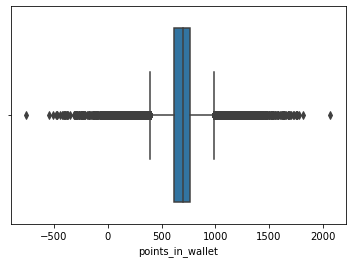

In [13]:
sns.boxplot(train['points_in_wallet'])

In [14]:
train['membership_category'].value_counts()

Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: membership_category, dtype: int64

In [15]:
train['internet_option'].value_counts()

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64

In [16]:
train['joined_through_referral'].value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [17]:
train['medium_of_operation'].value_counts()

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='avg_time_spent'>

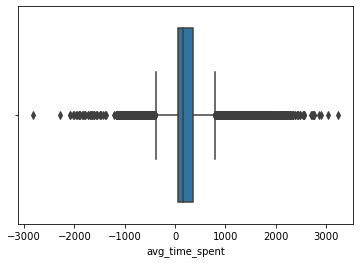

In [18]:
sns.boxplot(train['avg_time_spent'])

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='avg_transaction_value'>

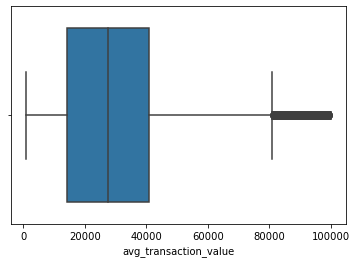

In [19]:
sns.boxplot(train['avg_transaction_value'])

In [20]:
train['offer_application_preference'].value_counts()

Yes    20440
No     16552
Name: offer_application_preference, dtype: int64

In [21]:
train['used_special_discount'].value_counts()

Yes    20342
No     16650
Name: used_special_discount, dtype: int64

In [22]:
train.groupby(['region_category', 'membership_category'])['customer_id'].count()

region_category  membership_category
City             Basic Membership       2694
                 Gold Membership        2387
                 No Membership          2672
                 Platinum Membership    1440
                 Premium Membership     1514
                 Silver Membership      2030
Town             Basic Membership       2942
                 Gold Membership        2520
                 No Membership          2941
                 Platinum Membership    1693
                 Premium Membership     1662
                 Silver Membership      2370
Village          Basic Membership        926
                 Gold Membership         881
                 No Membership           927
                 Platinum Membership     585
                 Premium Membership      627
                 Silver Membership       753
Name: customer_id, dtype: int64

In [23]:
train.groupby(['region_category', 'membership_category', 'preferred_offer_types'])['customer_id'].count()

region_category  membership_category  preferred_offer_types   
City             Basic Membership     Credit/Debit Card Offers     871
                                      Gift Vouchers/Coupons        856
                                      Without Offers               945
                 Gold Membership      Credit/Debit Card Offers     732
                                      Gift Vouchers/Coupons        865
                                      Without Offers               773
                 No Membership        Credit/Debit Card Offers     879
                                      Gift Vouchers/Coupons        857
                                      Without Offers               918
                 Platinum Membership  Credit/Debit Card Offers     492
                                      Gift Vouchers/Coupons        501
                                      Without Offers               434
                 Premium Membership   Credit/Debit Card Offers     510
              

In [24]:
train.groupby(['region_category', 'preferred_offer_types'])['customer_id'].count()

region_category  preferred_offer_types   
City             Credit/Debit Card Offers    4166
                 Gift Vouchers/Coupons       4266
                 Without Offers              4203
Town             Credit/Debit Card Offers    4742
                 Gift Vouchers/Coupons       4657
                 Without Offers              4626
Village          Credit/Debit Card Offers    1568
                 Gift Vouchers/Coupons       1615
                 Without Offers              1482
Name: customer_id, dtype: int64

In [25]:
train.groupby(['region_category'])['avg_transaction_value'].mean()

region_category
City       29113.498927
Town       29105.414562
Village    30473.511647
Name: avg_transaction_value, dtype: float64

In [26]:
train.groupby(['region_category'])['avg_transaction_value'].mean()

region_category
City       29113.498927
Town       29105.414562
Village    30473.511647
Name: avg_transaction_value, dtype: float64

In [81]:
df = train.dropna()
df.shape

(28373, 25)

In [72]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5
5,fffe43004900440036003300320035003300,Leslie Browder,13,M,PSG1LGF,City,Gold Membership,2016-01-08,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,06:46:07,23,433.62,13884.77,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,3


In [28]:
df['complaint_status'].value_counts()

Not Applicable              14222
Unsolved                     3574
Solved                       3535
Solved in Follow-up          3525
No Information Available     3517
Name: complaint_status, dtype: int64

In [50]:
df['medium_of_operation'].value_counts()

Smartphone    10710
Desktop       10610
?              4098
Both           2955
Name: medium_of_operation, dtype: int64

In [68]:
df['medium_of_operation'].replace({'?': 'Unknown'}, inplace=True)

D:\Programs\Anaconda\lib\site-packages\pandas\core\series.py:4515: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [70]:
df['feedback'].value_counts()

Poor Product Quality        4840
Poor Website                4823
Too many ads                4821
No reason specified         4812
Poor Customer Service       4791
User Friendly Website       1085
Quality Customer Care       1070
Products always in Stock    1066
Reasonable Price            1065
Name: feedback, dtype: int64

In [82]:
def dummy_encoding(col, df):
    for i in col:
        dummies = pd.get_dummies(df[i])
        print(i, dummies.columns)
        col_list = [i+'_'+x for x in dummies.columns]
        dummies.columns = col_list
        df = pd.concat([df, dummies], axis=1)
        df.drop([i], axis=1, inplace=True)
        print(df.shape)
    return df

In [83]:
enc_col = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types',
        'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 
        'complaint_status', 'feedback']

In [84]:
df = dummy_encoding(enc_col, df)
df.head()

gender Index(['F', 'M', 'Unknown'], dtype='object')
(28373, 27)
region_category Index(['City', 'Town', 'Village'], dtype='object')
(28373, 29)
membership_category Index(['Basic Membership', 'Gold Membership', 'No Membership',
       'Platinum Membership', 'Premium Membership', 'Silver Membership'],
      dtype='object')
(28373, 34)
joined_through_referral Index(['?', 'No', 'Yes'], dtype='object')
(28373, 36)
preferred_offer_types Index(['Credit/Debit Card Offers', 'Gift Vouchers/Coupons', 'Without Offers'], dtype='object')
(28373, 38)
medium_of_operation Index(['?', 'Both', 'Desktop', 'Smartphone'], dtype='object')
(28373, 41)
internet_option Index(['Fiber_Optic', 'Mobile_Data', 'Wi-Fi'], dtype='object')
(28373, 43)
used_special_discount Index(['No', 'Yes'], dtype='object')
(28373, 44)
offer_application_preference Index(['No', 'Yes'], dtype='object')
(28373, 45)
past_complaint Index(['No', 'Yes'], dtype='object')
(28373, 46)
complaint_status Index(['No Information Available', 'Not Appl

,customer_id,Name,age,security_no,joining_date,referral_id,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,gender_F,gender_M,gender_Unknown,region_category_City,region_category_Town,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_?,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_?,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe4300490044003600300030003800,Pattie Morrisey,18,XW0DQ7H,2017-08-17,xxxxxxxx,16:08:02,17,300.63,53005.25,17.0,781.75,2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,1F2TCL3,2016-11-11,CID12313,22:53:21,14,516.16,21027.00,22.0,500.69,5,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,VJGJ33N,2016-10-29,CID3793,15:57:50,11,53.27,25239.56,6.0,567.66,5,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,fffe43004900440031003900350030003600,Meghan Kosak,31,SVZXCWB,2017-09-12,xxxxxxxx,15:46:44,20,113.13,24483.66,16.0,663.06,5,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
5,fffe43004900440036003300320035003300,Leslie Browder,13,PSG1LGF,2016-01-08,xxxxxxxx,06:46:07,23,433.62,13884.77,24.0,722.27,3,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0


In [87]:
df['referral_status'] = df['referral_id'].apply(lambda x: 0 if x=='xxxxxxxx' else 1)

In [88]:
df['referral_status'].value_counts()

1    14628
0    13745
Name: referral_status, dtype: int64

In [109]:
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].apply(lambda x: 0 if x=='Error' else x)
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].astype('float')
df['avg_frequency_login_days'].dtype

dtype('float64')

In [132]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, f1_score

In [110]:
train_df = df.drop(['customer_id','Name','security_no','joining_date','referral_id','last_visit_time','churn_risk_score'], axis=1)
target = df['churn_risk_score']

In [111]:
x_train, x_test, y_train, y_test = train_test_split(train_df, target, random_state=42)

In [112]:
x_train.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,gender_F,gender_M,gender_Unknown,region_category_City,region_category_Town,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_?,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_?,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,referral_status
17061,46,15,465.990000,14775.27,6.0,692.87,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
18898,53,8,120.310000,5029.10,24.0,574.43,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
36860,33,9,32.070000,26352.02,22.0,531.65,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
33222,12,7,79.570000,46975.41,21.0,703.42,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1183,14,11,-345.221385,24438.46,25.0,702.43,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [125]:
train['churn_risk_score'].value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

In [126]:
xgb = XGBClassifier(objective='multi:softmax', num_class=6)
xgb.fit(x_train, y_train)

predict = xgb.predict_proba(x_test)

D:\Programs\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:25:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [127]:
predict

array([[6.77237567e-03, 2.00825321e-04, 1.30384622e-04, 2.25125274e-04,
        5.55193663e-01, 4.37477618e-01],
       [1.70434359e-02, 3.01724340e-05, 4.97390574e-05, 4.28160885e-03,
        9.78411555e-01, 1.83551907e-04],
       [5.52532310e-03, 1.31748879e-04, 1.38565243e-04, 9.92731273e-01,
        1.44213461e-03, 3.09974130e-05],
       ...,
       [1.23666562e-02, 1.87216101e-05, 1.06853804e-04, 6.45056307e-01,
        3.42374772e-01, 7.67446109e-05],
       [4.78468984e-02, 3.53731484e-05, 5.15480388e-05, 2.90981177e-02,
        9.22693908e-01, 2.74170248e-04],
       [1.73190795e-02, 3.20461186e-05, 3.52659496e-04, 3.57561558e-01,
        6.24648035e-01, 8.66316186e-05]], dtype=float32)

In [136]:
print('Accuracy on test data: {:.1f}%'.format(f1_score(y_test, xgb.predict(x_test), average="macro")*100))

Accuracy on test data: 63.7%


In [138]:
test_df = dummy_encoding(enc_col, test)

gender Index(['F', 'M', 'Unknown'], dtype='object')
(19919, 26)
region_category Index(['City', 'Town', 'Village'], dtype='object')
(19919, 28)
membership_category Index(['Basic Membership', 'Gold Membership', 'No Membership',
       'Platinum Membership', 'Premium Membership', 'Silver Membership'],
      dtype='object')
(19919, 33)
joined_through_referral Index(['?', 'No', 'Yes'], dtype='object')
(19919, 35)
preferred_offer_types Index(['Credit/Debit Card Offers', 'Gift Vouchers/Coupons', 'Without Offers'], dtype='object')
(19919, 37)
medium_of_operation Index(['?', 'Both', 'Desktop', 'Smartphone'], dtype='object')
(19919, 40)
internet_option Index(['Fiber_Optic', 'Mobile_Data', 'Wi-Fi'], dtype='object')
(19919, 42)
used_special_discount Index(['No', 'Yes'], dtype='object')
(19919, 43)
offer_application_preference Index(['No', 'Yes'], dtype='object')
(19919, 44)
past_complaint Index(['No', 'Yes'], dtype='object')
(19919, 45)
complaint_status Index(['No Information Available', 'Not Appl

In [140]:
test_df['referral_status'] = test_df['referral_id'].apply(lambda x: 0 if x=='xxxxxxxx' else 1)
test_df['avg_frequency_login_days'] = test_df['avg_frequency_login_days'].apply(lambda x: 0 if x=='Error' else x)
test_df['avg_frequency_login_days'] = test_df['avg_frequency_login_days'].astype('float')
test_df['avg_frequency_login_days'].dtype

dtype('float64')

In [141]:
test_df.head()

,customer_id,Name,age,security_no,joining_date,referral_id,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,gender_F,gender_M,gender_Unknown,region_category_City,region_category_Town,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_?,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_?,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,referral_status
0,fffe43004900440031003700300030003400,Alethia Meints,50,OQJ1XAY,2015-11-02,xxxxxxxx,07:19:30,12,386.26,40721.44,7.0,733.830000,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,fffe43004900440031003900370037003300,Ming Lopez,41,OUQRPKO,2016-03-01,xxxxxxxx,22:21:16,11,37.80,9644.40,9.0,726.000000,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,fffe43004900440034003800360037003000,Carina Flannigan,31,02J2RE7,2017-03-03,xxxxxxxx,16:40:39,18,215.36,3693.25,21.0,713.780000,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,fffe43004900440036003200370033003400,Kyung Wanner,64,5YEQIF1,2017-08-18,CID8941,14:56:17,-999,44.57,36809.56,11.0,744.970000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,fffe43004900440035003000370031003900,Enola Gatto,16,100RYB5,2015-05-05,CID5690,02:57:53,6,349.88,40675.86,8.0,299.048351,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [142]:
test_df = test_df.drop(['customer_id', 'Name', 'security_no', 'joining_date', 'referral_id', 'last_visit_time'], axis=1)
test_df.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,gender_F,gender_M,gender_Unknown,region_category_City,region_category_Town,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_?,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_?,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,referral_status
0,50,12,386.26,40721.44,7.0,733.830000,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,41,11,37.80,9644.40,9.0,726.000000,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,31,18,215.36,3693.25,21.0,713.780000,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,64,-999,44.57,36809.56,11.0,744.970000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,16,6,349.88,40675.86,8.0,299.048351,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [143]:
test_df.shape, x_train.shape

((19919, 52), (21279, 52))

In [144]:
test_predict = xgb.predict(test_df)

In [145]:
test_predict

array([3, 3, 3, ..., 5, 4, 3], dtype=int64)

In [147]:
final_df = test[['customer_id']]
final_df['churn_risk_score'] = test_predict
final_df.head()

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3
1,fffe43004900440031003900370037003300,3
2,fffe43004900440034003800360037003000,3
3,fffe43004900440036003200370033003400,3
4,fffe43004900440035003000370031003900,5


In [148]:
final_df.to_csv('submission1.csv')